In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns



# The task

Competition 4:

Goal: prediction of the Prognosis column
Evaluation metric: balanced accuracy

Subcompetition 1: use SVM for the prediction (you can use other models for data imputation)
Subcompetition 2: freeform

DATA DESCRIPTION
Predict the severity of COVID-19 in patients of Italian hospitals. The data is collected from 6 hospitals. Chest X-ray images are provided for each patient, which are collected in imgs.npy. Usage of the images are not required for either competition, but it is allowed.



**Feature description**

* Age - Patient’s age (years)
* Sex - Patient’s sex (0 – male, 1 – female)
* Body Temperature (°C) - Patient temperature at admission (in °C)
* Cough - Cough
* Dyspnea - Patient had intense tightening in the chest, air hunger, difficulty breathing, breathlessness or feeling of suffocation
* WBC - White blood cells count (10^9/L)
* CRP - C-reactive protein concentration (mg/dL)
* Fibrinogen - Fibrinogen concentration in blood (mg/dL)
* LDH - Lactate dehydrogenase concentration in blood (U/L)
* D-dimer - D-dimer amount in blood
* O2 - Oxygen percentage in blood
* PaO2 - Partial pressure of of oxygen in arterial blood (mmHg)
* SaO2 - Arterial oxygen saturation (%)
* pH - Blood pH
* Cardiovascular Disease - Patient had cardiovascular disease
* Respiratory Failure - Patient had respiratory failure
* Image - Index of corresponding image in imgs.npy (starting from 0)
* Death - Whether the patient died (not provided in test column)
* Prognosis - Severity of COVID

# Loading the data

In [2]:
# https://stackoverflow.com/questions/33480297/viewing-npy-images
img_array = np.load('imgs.npy')

In [3]:
img_array.shape

(1589, 256, 256)

In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
len(df_train), len(df_test)

(1289, 300)

In [6]:
df_train.head()

,Row_number,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,...,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Image,Death,Prognosis
0,228.0,D,35.913889,0,1.0,39.3,3.0,1.0,0.0,5.76,...,0.0,0.0,0.0,0.0,NaN,1.0,0.0,36,0,MILD
1,229.0,D,57.266667,0,1.0,37.0,3.0,0.0,0.0,11.48,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,37,0,MILD
2,96.0,A,39.000000,1,1.0,37.2,2.0,1.0,0.0,10.17,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20,0,MILD
3,112.0,A,44.000000,0,1.0,38.0,3.0,1.0,0.0,6.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66,0,SEVERE
4,97.0,A,76.000000,0,1.0,38.6,1.0,1.0,0.0,17.72,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,21,0,MILD


In [7]:
df_train.columns, len(df_train.columns)

(Index(['Row_number', 'Hospital', 'Age', 'Sex', 'PositivityAtAdmission',
        'Temp_C', 'DaysFever', 'Cough', 'DifficultyInBreathing', 'WBC', 'RBC',
        'CRP', 'Fibrinogen', 'Glucose', 'PCT', 'LDH', 'INR', 'D_dimer',
        'Ox_percentage', 'PaO2', 'SaO2', 'PaCO2', 'pH', 'CardiovascularDisease',
        'IschemicHeartDisease', 'AtrialFibrillation', 'HeartFailure', 'Ictus',
        'HighBloodPressure', 'Diabetes', 'Dementia', 'BPCO', 'Cancer',
        'ChronicKidneyDisease', 'RespiratoryFailure', 'Obesity', 'Position',
        'Image', 'Death', 'Prognosis'],
       dtype='object'),
 40)

In [8]:
df_test.head()

,Row_number,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,...,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Image
0,82.0,A,72.000000,1,1.0,37.3,3.0,1.0,0.0,5.370000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
1,236.0,D,60.791667,1,1.0,37.0,2.0,1.0,0.0,6.370000,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,46
2,251.0,D,51.983333,0,1.0,38.5,4.0,1.0,0.0,12.130000,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,63
3,238.0,D,62.891667,0,1.0,NaN,NaN,0.0,1.0,0.509028,...,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,1.0,48
4,266.0,E,44.000000,0,0.0,37.7,4.0,0.0,0.0,9.180000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,502


In [9]:
set(df_train["Image"].values) & set(df_test["Image"].values) # empty set

set()

In [10]:
df_test["Image"]

0         4
1        46
2        63
3        48
4       502
       ... 
295     844
296     943
297    1082
298     856
299     994
Name: Image, Length: 300, dtype: int64

In [11]:
df_train.columns

Index(['Row_number', 'Hospital', 'Age', 'Sex', 'PositivityAtAdmission',
       'Temp_C', 'DaysFever', 'Cough', 'DifficultyInBreathing', 'WBC', 'RBC',
       'CRP', 'Fibrinogen', 'Glucose', 'PCT', 'LDH', 'INR', 'D_dimer',
       'Ox_percentage', 'PaO2', 'SaO2', 'PaCO2', 'pH', 'CardiovascularDisease',
       'IschemicHeartDisease', 'AtrialFibrillation', 'HeartFailure', 'Ictus',
       'HighBloodPressure', 'Diabetes', 'Dementia', 'BPCO', 'Cancer',
       'ChronicKidneyDisease', 'RespiratoryFailure', 'Obesity', 'Position',
       'Image', 'Death', 'Prognosis'],
      dtype='object')

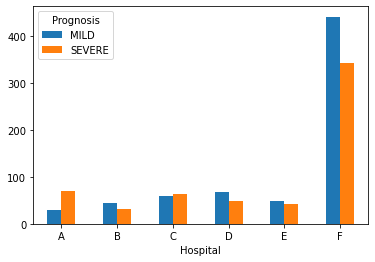

In [12]:
crosstb = pd.crosstab(df_train["Hospital"],df_train["Prognosis"])
barplot = crosstb.plot.bar(rot=0)

In [13]:
crosstb

Prognosis,MILD,SEVERE
Hospital,,
A,29,70
B,45,31
C,59,64
D,68,49
E,48,42
F,441,343


In [14]:
df_train["Prognosis"].value_counts() # ---> balanced dataset

MILD      690
SEVERE    599
Name: Prognosis, dtype: int64

In [15]:
df_train.columns

Index(['Row_number', 'Hospital', 'Age', 'Sex', 'PositivityAtAdmission',
       'Temp_C', 'DaysFever', 'Cough', 'DifficultyInBreathing', 'WBC', 'RBC',
       'CRP', 'Fibrinogen', 'Glucose', 'PCT', 'LDH', 'INR', 'D_dimer',
       'Ox_percentage', 'PaO2', 'SaO2', 'PaCO2', 'pH', 'CardiovascularDisease',
       'IschemicHeartDisease', 'AtrialFibrillation', 'HeartFailure', 'Ictus',
       'HighBloodPressure', 'Diabetes', 'Dementia', 'BPCO', 'Cancer',
       'ChronicKidneyDisease', 'RespiratoryFailure', 'Obesity', 'Position',
       'Image', 'Death', 'Prognosis'],
      dtype='object')

In [16]:
df_test.columns

Index(['Row_number', 'Hospital', 'Age', 'Sex', 'PositivityAtAdmission',
       'Temp_C', 'DaysFever', 'Cough', 'DifficultyInBreathing', 'WBC', 'RBC',
       'CRP', 'Fibrinogen', 'Glucose', 'PCT', 'LDH', 'INR', 'D_dimer',
       'Ox_percentage', 'PaO2', 'SaO2', 'PaCO2', 'pH', 'CardiovascularDisease',
       'IschemicHeartDisease', 'AtrialFibrillation', 'HeartFailure', 'Ictus',
       'HighBloodPressure', 'Diabetes', 'Dementia', 'BPCO', 'Cancer',
       'ChronicKidneyDisease', 'RespiratoryFailure', 'Obesity', 'Position',
       'Image'],
      dtype='object')

In [17]:
len(df_train.columns), len(df_test.columns)

(40, 38)

In [18]:
df_train.iloc[10]["Prognosis"]

'MILD'

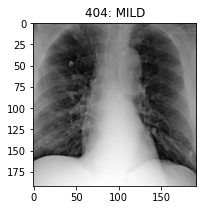

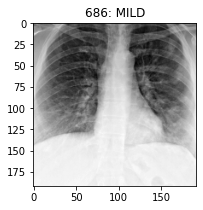

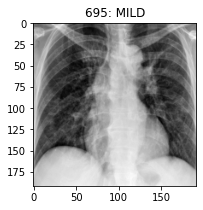

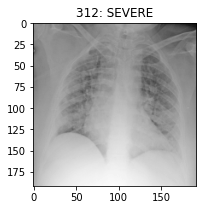

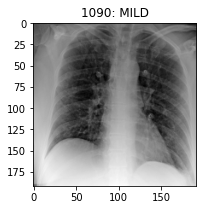

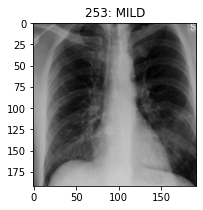

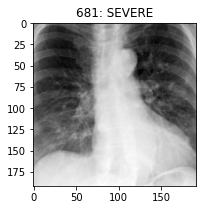

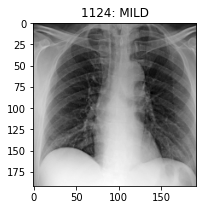

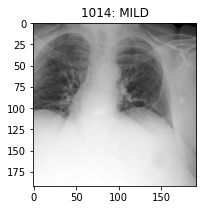

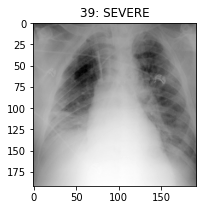

In [19]:
# Some examples from the pictures
for i in range(10):
    plt.figure(figsize=(3,3))
    ind = np.random.randint(len(df_train))
    
    illness = df_train.iloc[ind]["Prognosis"]
    
    img = img_array[df_train.iloc[ind]["Image"]][32:224,32:224]
    plt.imshow(img, cmap='gray')
    #plt.imshow(img[16:240,16:240], cmap='gray')
    plt.title(f"{ind}: {illness}")
    plt.show()

In [20]:
img.shape

(192, 192)

# Missing values --- Very little data exploration

In [21]:
# Dropping columns with missing values over 15% ratio
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Fibrinogen,1054,0.817688
Ox_percentage,677,0.525213
D_dimer,676,0.524438
SaO2,622,0.482545
IschemicHeartDisease,610,0.473235
PCT,564,0.437548
Ictus,498,0.386346
HeartFailure,498,0.386346
AtrialFibrillation,498,0.386346
CardiovascularDisease,495,0.384019


In [22]:
# Dropping columns with missing values over 15% ratio
total_test = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test

,Total,Percent
Fibrinogen,256,0.853333
Ox_percentage,173,0.576667
D_dimer,151,0.503333
IschemicHeartDisease,150,0.500000
Ictus,131,0.436667
HeartFailure,131,0.436667
AtrialFibrillation,130,0.433333
CardiovascularDisease,130,0.433333
Position,125,0.416667
SaO2,115,0.383333


In [23]:
df_train["RespiratoryFailure"].mean()

0.01893939393939394

In [24]:
pd.crosstab(df_train["RespiratoryFailure"],df_train["Prognosis"])

Prognosis,MILD,SEVERE
RespiratoryFailure,,
0.0,554,482
1.0,5,15


In [25]:
# Dropping
df_train_dropped = df_train.drop((missing_data[missing_data['Percent']>0.15]).index,axis=1)
df_test_dropped = df_test.drop((missing_data[missing_data['Percent']>0.15]).index,axis=1)

In [26]:
df_train_dropped.columns, df_test_dropped.columns

(Index(['Row_number', 'Hospital', 'Age', 'Sex', 'PositivityAtAdmission',
        'Temp_C', 'Cough', 'DifficultyInBreathing', 'WBC', 'RBC', 'CRP',
        'Glucose', 'HighBloodPressure', 'Diabetes', 'Dementia', 'BPCO',
        'Cancer', 'ChronicKidneyDisease', 'Image', 'Death', 'Prognosis'],
       dtype='object'),
 Index(['Row_number', 'Hospital', 'Age', 'Sex', 'PositivityAtAdmission',
        'Temp_C', 'Cough', 'DifficultyInBreathing', 'WBC', 'RBC', 'CRP',
        'Glucose', 'HighBloodPressure', 'Diabetes', 'Dementia', 'BPCO',
        'Cancer', 'ChronicKidneyDisease', 'Image'],
       dtype='object'))

In [27]:
len(missing_data_test[missing_data_test["Percent"]<=0.15])

19

In [28]:
A1 = set(missing_data_test[missing_data_test["Percent"]<=0.15].index)

In [29]:
len(missing_data[missing_data["Percent"]<=0.15])

21

In [30]:
A2 = set(missing_data[missing_data["Percent"]<=0.15].index)

In [31]:
len(A1.intersection(A2))

19

In [32]:
df_train_dropped

,Row_number,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,Cough,DifficultyInBreathing,WBC,RBC,...,Glucose,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,Image,Death,Prognosis
0,228.0,D,35.913889,0,1.0,39.3,1.0,0.0,5.76,5.24,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,36,0,MILD
1,229.0,D,57.266667,0,1.0,37.0,0.0,0.0,11.48,5.71,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,37,0,MILD
2,96.0,A,39.000000,1,1.0,37.2,1.0,0.0,10.17,3.45,...,80.0,0.0,0.0,0.0,0.0,0.0,0.0,20,0,MILD
3,112.0,A,44.000000,0,1.0,38.0,1.0,0.0,6.64,5.55,...,126.0,0.0,0.0,0.0,0.0,0.0,0.0,66,0,SEVERE
4,97.0,A,76.000000,0,1.0,38.6,1.0,0.0,17.72,7.16,...,171.0,0.0,0.0,0.0,1.0,1.0,1.0,21,0,MILD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,1474.0,F,84.000000,1,1.0,37.0,0.0,0.0,7.20,4.28,...,112.0,1.0,0.0,1.0,0.0,0.0,0.0,960,0,MILD
1285,1228.0,F,51.000000,0,1.0,38.0,0.0,1.0,6.40,4.40,...,97.0,0.0,1.0,0.0,0.0,0.0,0.0,608,0,SEVERE
1286,1466.0,F,70.000000,1,1.0,36.4,1.0,0.0,6.00,4.22,...,104.0,1.0,0.0,0.0,0.0,0.0,0.0,744,0,MILD
1287,1210.0,F,90.000000,0,1.0,36.2,0.0,0.0,7.10,5.44,...,320.0,0.0,1.0,0.0,0.0,0.0,0.0,940,0,MILD


In [33]:
df_train_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Row_number             1289 non-null   float64
 1   Hospital               1289 non-null   object 
 2   Age                    1288 non-null   float64
 3   Sex                    1289 non-null   int64  
 4   PositivityAtAdmission  1261 non-null   float64
 5   Temp_C                 1140 non-null   float64
 6   Cough                  1282 non-null   float64
 7   DifficultyInBreathing  1283 non-null   float64
 8   WBC                    1269 non-null   float64
 9   RBC                    1250 non-null   float64
 10  CRP                    1245 non-null   float64
 11  Glucose                1115 non-null   float64
 12  HighBloodPressure      1173 non-null   float64
 13  Diabetes               1173 non-null   float64
 14  Dementia               1172 non-null   float64
 15  BPCO

In [34]:
df_train_dropped.isna().sum()

Row_number                 0
Hospital                   0
Age                        1
Sex                        0
PositivityAtAdmission     28
Temp_C                   149
Cough                      7
DifficultyInBreathing      6
WBC                       20
RBC                       39
CRP                       44
Glucose                  174
HighBloodPressure        116
Diabetes                 116
Dementia                 117
BPCO                     116
Cancer                   116
ChronicKidneyDisease     116
Image                      0
Death                      0
Prognosis                  0
dtype: int64

In [35]:
df_train.describe()

,Row_number,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,RBC,...,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Image,Death
count,1289.000000,1288.000000,1289.000000,1261.000000,1140.000000,961.000000,1282.000000,1283.000000,1269.000000,1250.000000,...,1173.000000,1172.000000,1173.000000,1173.000000,1173.000000,1056.000000,821.000000,808.00000,1289.000000,1289.000000
mean,805.904166,65.577995,0.376261,0.973830,37.320439,2.625390,0.443838,0.512860,6.985690,4.576949,...,0.161125,0.044369,0.067349,0.067349,0.061381,0.018939,0.084044,0.79703,783.831652,0.159814
std,469.368615,15.417067,0.484635,0.159703,0.980716,1.059255,0.497030,0.500029,3.680785,0.700560,...,0.367803,0.206001,0.250732,0.250732,0.240130,0.136376,0.277623,0.40246,462.109750,0.366576
min,1.000000,17.000000,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.470000,0.256250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,387.000000,55.000000,0.000000,1.000000,36.500000,2.000000,0.000000,0.000000,4.630000,4.210000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,379.000000,0.000000
50%,799.000000,67.000000,0.000000,1.000000,37.300000,3.000000,0.000000,1.000000,6.260000,4.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,776.000000,0.000000
75%,1199.000000,78.000000,1.000000,1.000000,38.000000,4.000000,1.000000,1.000000,8.390000,5.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1181.000000,0.000000
max,1616.000000,100.000000,1.000000,1.000000,40.000000,4.000000,1.000000,1.000000,52.310000,8.340000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1588.000000,1.000000


In [36]:
pd.crosstab(df_train["Dementia"],df_train["Prognosis"]), 30/(52)

(Prognosis  MILD  SEVERE
 Dementia               
 0.0         605     515
 1.0          22      30,
 0.5769230769230769)

In [37]:
pd.crosstab(df_train["PositivityAtAdmission"],df_train["Prognosis"])

Prognosis,MILD,SEVERE
PositivityAtAdmission,,
0.0,21,12
1.0,653,575


In [38]:
pd.crosstab(df_train["Cancer"],df_train["Prognosis"]), 34/(34+45)

(Prognosis  MILD  SEVERE
 Cancer                 
 0.0         594     500
 1.0          34      45,
 0.43037974683544306)

In [39]:
pd.crosstab(df_train["Obesity"],df_train["Prognosis"]), 412/(412+340), 41/(41+28)

(Prognosis  MILD  SEVERE
 Obesity                
 0.0         412     340
 1.0          28      41,
 0.5478723404255319,
 0.5942028985507246)

In [40]:
pd.crosstab(df_train["Position"],df_train["Prognosis"]), 361/(361+283), 111/(111+53)

(Prognosis  MILD  SEVERE
 Position               
 0.0         111      53
 1.0         283     361,
 0.5605590062111802,
 0.676829268292683)

In [41]:
pd.crosstab(df_train["Cough"],df_train["Prognosis"]), 320/(320+249)

(Prognosis  MILD  SEVERE
 Cough                  
 0.0         367     346
 1.0         320     249,
 0.562390158172232)

In [42]:
pd.crosstab(df_train["DifficultyInBreathing"],df_train["Prognosis"]), 391/(391+267)

(Prognosis              MILD  SEVERE
 DifficultyInBreathing              
 0.0                     420     205
 1.0                     267     391,
 0.5942249240121581)

In [43]:
df_train["PositivityAtAdmission"], df_train["PositivityAtAdmission"].mean()

(0       1.0
 1       1.0
 2       1.0
 3       1.0
 4       1.0
        ... 
 1284    1.0
 1285    1.0
 1286    1.0
 1287    1.0
 1288    1.0
 Name: PositivityAtAdmission, Length: 1289, dtype: float64,
 0.9738302934179223)

In [44]:
df_test_dropped

,Row_number,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,Cough,DifficultyInBreathing,WBC,RBC,CRP,Glucose,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,Image
0,82.0,A,72.000000,1,1.0,37.3,1.0,0.0,5.370000,4.58,3.96,98.0,0.0,0.0,0.0,0.0,1.0,0.0,4
1,236.0,D,60.791667,1,1.0,37.0,1.0,0.0,6.370000,4.85,20.70,NaN,0.0,0.0,0.0,0.0,0.0,0.0,46
2,251.0,D,51.983333,0,1.0,38.5,1.0,0.0,12.130000,4.98,86.70,NaN,0.0,0.0,0.0,0.0,0.0,0.0,63
3,238.0,D,62.891667,0,1.0,NaN,0.0,1.0,0.509028,5.11,88.10,NaN,1.0,0.0,0.0,0.0,0.0,1.0,48
4,266.0,E,44.000000,0,0.0,37.7,0.0,0.0,9.180000,5.12,42.70,242.0,0.0,0.0,0.0,0.0,0.0,0.0,502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1431.0,F,50.000000,1,1.0,37.0,1.0,0.0,4.140000,4.10,1.89,134.0,0.0,0.0,0.0,0.0,0.0,0.0,844
296,1172.0,F,81.000000,1,1.0,36.1,0.0,1.0,4.420000,4.15,6.75,115.0,0.0,0.0,0.0,0.0,0.0,0.0,943
297,1439.0,F,68.000000,1,1.0,38.7,0.0,1.0,5.000000,4.62,8.51,112.0,0.0,0.0,0.0,0.0,1.0,0.0,1082
298,1448.0,F,60.000000,1,1.0,36.2,1.0,1.0,5.240000,3.84,1.33,128.0,1.0,1.0,0.0,0.0,0.0,0.0,856


In [45]:
df_train_dropped.isna().sum(), df_test_dropped.isna().sum()

(Row_number                 0
 Hospital                   0
 Age                        1
 Sex                        0
 PositivityAtAdmission     28
 Temp_C                   149
 Cough                      7
 DifficultyInBreathing      6
 WBC                       20
 RBC                       39
 CRP                       44
 Glucose                  174
 HighBloodPressure        116
 Diabetes                 116
 Dementia                 117
 BPCO                     116
 Cancer                   116
 ChronicKidneyDisease     116
 Image                      0
 Death                      0
 Prognosis                  0
 dtype: int64,
 Row_number                0
 Hospital                  0
 Age                       0
 Sex                       0
 PositivityAtAdmission    11
 Temp_C                   25
 Cough                     0
 DifficultyInBreathing     0
 WBC                       6
 RBC                      13
 CRP                      16
 Glucose                  33
 HighBl

In [46]:
len(df_train_dropped), len(df_test_dropped)

(1289, 300)

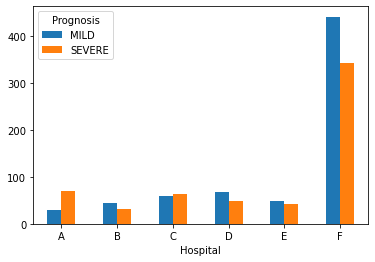

In [47]:
crosstb = pd.crosstab(df_train_dropped["Hospital"],df_train_dropped["Prognosis"])
barplot = crosstb.plot.bar(rot=0)

In [48]:
crosstb

Prognosis,MILD,SEVERE
Hospital,,
A,29,70
B,45,31
C,59,64
D,68,49
E,48,42
F,441,343


I'll merge together the B+D+F classes and C+E to another class.

In [49]:
df_train_dropped["Hospital"] = df_train_dropped["Hospital"].replace({'B':'BDF','D':'BDF','F':'BDF','C':'CE','E':'CE'})

In [50]:
df_train_dropped["Hospital"].value_counts()

BDF    977
CE     213
A       99
Name: Hospital, dtype: int64

In [51]:
df_test_dropped["Hospital"] = df_test_dropped["Hospital"].replace({'B':'BDF','D':'BDF','F':'BDF','C':'CE','E':'CE'})

In [52]:
df_train_dropped.describe()

,Row_number,Age,Sex,PositivityAtAdmission,Temp_C,Cough,DifficultyInBreathing,WBC,RBC,CRP,Glucose,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,Image,Death
count,1289.000000,1288.000000,1289.000000,1261.000000,1140.000000,1282.000000,1283.000000,1269.000000,1250.000000,1245.000000,1115.000000,1173.000000,1173.000000,1172.000000,1173.000000,1173.000000,1173.000000,1289.000000,1289.000000
mean,805.904166,65.577995,0.376261,0.973830,37.320439,0.443838,0.512860,6.985690,4.576949,24.836072,125.580269,0.476556,0.161125,0.044369,0.067349,0.067349,0.061381,783.831652,0.159814
std,469.368615,15.417067,0.484635,0.159703,0.980716,0.497030,0.500029,3.680785,0.700560,51.763952,58.736927,0.499663,0.367803,0.206001,0.250732,0.250732,0.240130,462.109750,0.366576
min,1.000000,17.000000,0.000000,0.000000,35.000000,0.000000,0.000000,0.470000,0.256250,0.010000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,387.000000,55.000000,0.000000,1.000000,36.500000,0.000000,0.000000,4.630000,4.210000,2.930000,97.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,379.000000,0.000000
50%,799.000000,67.000000,0.000000,1.000000,37.300000,0.000000,1.000000,6.260000,4.600000,9.140000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,776.000000,0.000000
75%,1199.000000,78.000000,1.000000,1.000000,38.000000,1.000000,1.000000,8.390000,5.010000,19.100000,133.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1181.000000,0.000000
max,1616.000000,100.000000,1.000000,1.000000,40.000000,1.000000,1.000000,52.310000,8.340000,570.500000,874.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1588.000000,1.000000


In [53]:
df_train_dropped = df_train_dropped.drop("Death",axis=1)

In [54]:
df_train_dropped["Prognosis"] = df_train_dropped["Prognosis"].replace({"MILD":0,"SEVERE":1})

In [55]:
image_indices = df_train_dropped["Image"]
image_indices_subm = df_test_dropped["Image"]
df_train_dropped = df_train_dropped.drop("Image",axis=1)
df_test_dropped = df_test_dropped.drop("Image",axis=1)

In [56]:
df_train_dropped = df_train_dropped.drop("Row_number",axis=1)
df_test_dropped = df_test_dropped.drop("Row_number",axis=1)

## Duplicates?

In [57]:
duplicates_index = df_train_dropped[df_train_dropped.duplicated(keep="first")].index
duplicates_index

Int64Index([], dtype='int64')

In [58]:
duplicates_index = df_test_dropped[df_test_dropped.duplicated(keep="first")].index
duplicates_index

Int64Index([], dtype='int64')

## Categorical features --- One-hot encoding

In [59]:
df_train_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hospital               1289 non-null   object 
 1   Age                    1288 non-null   float64
 2   Sex                    1289 non-null   int64  
 3   PositivityAtAdmission  1261 non-null   float64
 4   Temp_C                 1140 non-null   float64
 5   Cough                  1282 non-null   float64
 6   DifficultyInBreathing  1283 non-null   float64
 7   WBC                    1269 non-null   float64
 8   RBC                    1250 non-null   float64
 9   CRP                    1245 non-null   float64
 10  Glucose                1115 non-null   float64
 11  HighBloodPressure      1173 non-null   float64
 12  Diabetes               1173 non-null   float64
 13  Dementia               1172 non-null   float64
 14  BPCO                   1173 non-null   float64
 15  Canc

In [60]:
df_train_dropped

,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,Cough,DifficultyInBreathing,WBC,RBC,CRP,Glucose,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,Prognosis
0,BDF,35.913889,0,1.0,39.3,1.0,0.0,5.76,5.24,43.40,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0
1,BDF,57.266667,0,1.0,37.0,0.0,0.0,11.48,5.71,64.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0
2,A,39.000000,1,1.0,37.2,1.0,0.0,10.17,3.45,0.75,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,A,44.000000,0,1.0,38.0,1.0,0.0,6.64,5.55,5.20,126.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,A,76.000000,0,1.0,38.6,1.0,0.0,17.72,7.16,13.72,171.0,0.0,0.0,0.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,BDF,84.000000,1,1.0,37.0,0.0,0.0,7.20,4.28,1.01,112.0,1.0,0.0,1.0,0.0,0.0,0.0,0
1285,BDF,51.000000,0,1.0,38.0,0.0,1.0,6.40,4.40,15.27,97.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1286,BDF,70.000000,1,1.0,36.4,1.0,0.0,6.00,4.22,13.88,104.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1287,BDF,90.000000,0,1.0,36.2,0.0,0.0,7.10,5.44,4.20,320.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [61]:
df_test_dropped

,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,Cough,DifficultyInBreathing,WBC,RBC,CRP,Glucose,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease
0,A,72.000000,1,1.0,37.3,1.0,0.0,5.370000,4.58,3.96,98.0,0.0,0.0,0.0,0.0,1.0,0.0
1,BDF,60.791667,1,1.0,37.0,1.0,0.0,6.370000,4.85,20.70,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,BDF,51.983333,0,1.0,38.5,1.0,0.0,12.130000,4.98,86.70,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,BDF,62.891667,0,1.0,NaN,0.0,1.0,0.509028,5.11,88.10,NaN,1.0,0.0,0.0,0.0,0.0,1.0
4,CE,44.000000,0,0.0,37.7,0.0,0.0,9.180000,5.12,42.70,242.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,BDF,50.000000,1,1.0,37.0,1.0,0.0,4.140000,4.10,1.89,134.0,0.0,0.0,0.0,0.0,0.0,0.0
296,BDF,81.000000,1,1.0,36.1,0.0,1.0,4.420000,4.15,6.75,115.0,0.0,0.0,0.0,0.0,0.0,0.0
297,BDF,68.000000,1,1.0,38.7,0.0,1.0,5.000000,4.62,8.51,112.0,0.0,0.0,0.0,0.0,1.0,0.0
298,BDF,60.000000,1,1.0,36.2,1.0,1.0,5.240000,3.84,1.33,128.0,1.0,1.0,0.0,0.0,0.0,0.0


In [62]:
df_train_dropped = pd.get_dummies(df_train_dropped)
df_test_dropped = pd.get_dummies(df_test_dropped)

In [63]:
df_train_dropped

,Age,Sex,PositivityAtAdmission,Temp_C,Cough,DifficultyInBreathing,WBC,RBC,CRP,Glucose,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,Prognosis,Hospital_A,Hospital_BDF,Hospital_CE
0,35.913889,0,1.0,39.3,1.0,0.0,5.76,5.24,43.40,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
1,57.266667,0,1.0,37.0,0.0,0.0,11.48,5.71,64.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
2,39.000000,1,1.0,37.2,1.0,0.0,10.17,3.45,0.75,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
3,44.000000,0,1.0,38.0,1.0,0.0,6.64,5.55,5.20,126.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0
4,76.000000,0,1.0,38.6,1.0,0.0,17.72,7.16,13.72,171.0,0.0,0.0,0.0,1.0,1.0,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,84.000000,1,1.0,37.0,0.0,0.0,7.20,4.28,1.01,112.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0
1285,51.000000,0,1.0,38.0,0.0,1.0,6.40,4.40,15.27,97.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,1,0
1286,70.000000,1,1.0,36.4,1.0,0.0,6.00,4.22,13.88,104.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
1287,90.000000,0,1.0,36.2,0.0,0.0,7.10,5.44,4.20,320.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0


In [64]:
df_test_dropped

,Age,Sex,PositivityAtAdmission,Temp_C,Cough,DifficultyInBreathing,WBC,RBC,CRP,Glucose,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,Hospital_A,Hospital_BDF,Hospital_CE
0,72.000000,1,1.0,37.3,1.0,0.0,5.370000,4.58,3.96,98.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0
1,60.791667,1,1.0,37.0,1.0,0.0,6.370000,4.85,20.70,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2,51.983333,0,1.0,38.5,1.0,0.0,12.130000,4.98,86.70,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
3,62.891667,0,1.0,NaN,0.0,1.0,0.509028,5.11,88.10,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0,1,0
4,44.000000,0,0.0,37.7,0.0,0.0,9.180000,5.12,42.70,242.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,50.000000,1,1.0,37.0,1.0,0.0,4.140000,4.10,1.89,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
296,81.000000,1,1.0,36.1,0.0,1.0,4.420000,4.15,6.75,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
297,68.000000,1,1.0,38.7,0.0,1.0,5.000000,4.62,8.51,112.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0
298,60.000000,1,1.0,36.2,1.0,1.0,5.240000,3.84,1.33,128.0,1.0,1.0,0.0,0.0,0.0,0.0,0,1,0


## Imputing the missing values

In [65]:
# the missing value in the given column is replaced by the average value corresponding to the class
for column in df_train_dropped.columns[:-1]:
    df_train_dropped[column] = df_train_dropped.groupby(["Prognosis"],sort=False)[column].apply(lambda x: x.fillna(x.mean()))

In [66]:
df_train_dropped

,Age,Sex,PositivityAtAdmission,Temp_C,Cough,DifficultyInBreathing,WBC,RBC,CRP,Glucose,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,Prognosis,Hospital_A,Hospital_BDF,Hospital_CE
0,35.913889,0,1.0,39.3,1.0,0.0,5.76,5.24,43.40,119.746244,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
1,57.266667,0,1.0,37.0,0.0,0.0,11.48,5.71,64.00,119.746244,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
2,39.000000,1,1.0,37.2,1.0,0.0,10.17,3.45,0.75,80.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
3,44.000000,0,1.0,38.0,1.0,0.0,6.64,5.55,5.20,126.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0
4,76.000000,0,1.0,38.6,1.0,0.0,17.72,7.16,13.72,171.000000,0.0,0.0,0.0,1.0,1.0,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,84.000000,1,1.0,37.0,0.0,0.0,7.20,4.28,1.01,112.000000,1.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0
1285,51.000000,0,1.0,38.0,0.0,1.0,6.40,4.40,15.27,97.000000,0.0,1.0,0.0,0.0,0.0,0.0,1,0,1,0
1286,70.000000,1,1.0,36.4,1.0,0.0,6.00,4.22,13.88,104.000000,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
1287,90.000000,0,1.0,36.2,0.0,0.0,7.10,5.44,4.20,320.000000,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0


In [67]:
prognosis = df_train_dropped["Prognosis"]

In [68]:
df_train_dropped = df_train_dropped.drop("Prognosis",axis=1)

In [69]:
df_train_dropped

,Age,Sex,PositivityAtAdmission,Temp_C,Cough,DifficultyInBreathing,WBC,RBC,CRP,Glucose,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,Hospital_A,Hospital_BDF,Hospital_CE
0,35.913889,0,1.0,39.3,1.0,0.0,5.76,5.24,43.40,119.746244,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,57.266667,0,1.0,37.0,0.0,0.0,11.48,5.71,64.00,119.746244,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2,39.000000,1,1.0,37.2,1.0,0.0,10.17,3.45,0.75,80.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
3,44.000000,0,1.0,38.0,1.0,0.0,6.64,5.55,5.20,126.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,76.000000,0,1.0,38.6,1.0,0.0,17.72,7.16,13.72,171.000000,0.0,0.0,0.0,1.0,1.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,84.000000,1,1.0,37.0,0.0,0.0,7.20,4.28,1.01,112.000000,1.0,0.0,1.0,0.0,0.0,0.0,0,1,0
1285,51.000000,0,1.0,38.0,0.0,1.0,6.40,4.40,15.27,97.000000,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0
1286,70.000000,1,1.0,36.4,1.0,0.0,6.00,4.22,13.88,104.000000,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1287,90.000000,0,1.0,36.2,0.0,0.0,7.10,5.44,4.20,320.000000,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0


In [70]:
df_test_dropped

,Age,Sex,PositivityAtAdmission,Temp_C,Cough,DifficultyInBreathing,WBC,RBC,CRP,Glucose,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,Hospital_A,Hospital_BDF,Hospital_CE
0,72.000000,1,1.0,37.3,1.0,0.0,5.370000,4.58,3.96,98.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0
1,60.791667,1,1.0,37.0,1.0,0.0,6.370000,4.85,20.70,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2,51.983333,0,1.0,38.5,1.0,0.0,12.130000,4.98,86.70,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
3,62.891667,0,1.0,NaN,0.0,1.0,0.509028,5.11,88.10,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0,1,0
4,44.000000,0,0.0,37.7,0.0,0.0,9.180000,5.12,42.70,242.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,50.000000,1,1.0,37.0,1.0,0.0,4.140000,4.10,1.89,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
296,81.000000,1,1.0,36.1,0.0,1.0,4.420000,4.15,6.75,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
297,68.000000,1,1.0,38.7,0.0,1.0,5.000000,4.62,8.51,112.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0
298,60.000000,1,1.0,36.2,1.0,1.0,5.240000,3.84,1.33,128.0,1.0,1.0,0.0,0.0,0.0,0.0,0,1,0


In [71]:
len(df_train_dropped), len(df_test_dropped)

(1289, 300)

In [72]:
df_all = pd.concat([df_train_dropped,df_test_dropped],axis=0)

In [73]:
df_all

,Age,Sex,PositivityAtAdmission,Temp_C,Cough,DifficultyInBreathing,WBC,RBC,CRP,Glucose,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,Hospital_A,Hospital_BDF,Hospital_CE
0,35.913889,0,1.0,39.3,1.0,0.0,5.76,5.24,43.40,119.746244,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,57.266667,0,1.0,37.0,0.0,0.0,11.48,5.71,64.00,119.746244,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2,39.000000,1,1.0,37.2,1.0,0.0,10.17,3.45,0.75,80.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
3,44.000000,0,1.0,38.0,1.0,0.0,6.64,5.55,5.20,126.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,76.000000,0,1.0,38.6,1.0,0.0,17.72,7.16,13.72,171.000000,0.0,0.0,0.0,1.0,1.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,50.000000,1,1.0,37.0,1.0,0.0,4.14,4.10,1.89,134.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
296,81.000000,1,1.0,36.1,0.0,1.0,4.42,4.15,6.75,115.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
297,68.000000,1,1.0,38.7,0.0,1.0,5.00,4.62,8.51,112.000000,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0
298,60.000000,1,1.0,36.2,1.0,1.0,5.24,3.84,1.33,128.000000,1.0,1.0,0.0,0.0,0.0,0.0,0,1,0


In [74]:
df_all.isna().sum()

Age                       0
Sex                       0
PositivityAtAdmission    11
Temp_C                   25
Cough                     0
DifficultyInBreathing     0
WBC                       6
RBC                      13
CRP                      16
Glucose                  33
HighBloodPressure        27
Diabetes                 27
Dementia                 29
BPCO                     27
Cancer                   27
ChronicKidneyDisease     27
Hospital_A                0
Hospital_BDF              0
Hospital_CE               0
dtype: int64

In [75]:
# Filling with the means very simply
df_all = df_all.fillna(df_all.mean())

In [76]:
len(df_all)

1589

In [77]:
df_all.isna().sum()

Age                      0
Sex                      0
PositivityAtAdmission    0
Temp_C                   0
Cough                    0
DifficultyInBreathing    0
WBC                      0
RBC                      0
CRP                      0
Glucose                  0
HighBloodPressure        0
Diabetes                 0
Dementia                 0
BPCO                     0
Cancer                   0
ChronicKidneyDisease     0
Hospital_A               0
Hospital_BDF             0
Hospital_CE              0
dtype: int64

## Scaling

In [78]:
df_all.abs().max()

Age                      100.00
Sex                        1.00
PositivityAtAdmission      1.00
Temp_C                    41.50
Cough                      1.00
DifficultyInBreathing      1.00
WBC                       52.31
RBC                        8.34
CRP                      570.50
Glucose                  874.00
HighBloodPressure          1.00
Diabetes                   1.00
Dementia                   1.00
BPCO                       1.00
Cancer                     1.00
ChronicKidneyDisease       1.00
Hospital_A                 1.00
Hospital_BDF               1.00
Hospital_CE                1.00
dtype: float64

In [79]:
df_all = df_all / df_all.abs().max()

## Splitting back

In [80]:
df = df_all.iloc[:1289]
df_subm = df_all.iloc[1289:]

In [81]:
df

,Age,Sex,PositivityAtAdmission,Temp_C,Cough,DifficultyInBreathing,WBC,RBC,CRP,Glucose,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,Hospital_A,Hospital_BDF,Hospital_CE
0,0.359139,0.0,1.0,0.946988,1.0,0.0,0.110113,0.628297,0.076074,0.137009,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.572667,0.0,1.0,0.891566,0.0,0.0,0.219461,0.684652,0.112182,0.137009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.390000,1.0,1.0,0.896386,1.0,0.0,0.194418,0.413669,0.001315,0.091533,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.440000,0.0,1.0,0.915663,1.0,0.0,0.126936,0.665468,0.009115,0.144165,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.760000,0.0,1.0,0.930120,1.0,0.0,0.338750,0.858513,0.024049,0.195652,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,0.840000,1.0,1.0,0.891566,0.0,0.0,0.137641,0.513189,0.001770,0.128146,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1285,0.510000,0.0,1.0,0.915663,0.0,1.0,0.122348,0.527578,0.026766,0.110984,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1286,0.700000,1.0,1.0,0.877108,1.0,0.0,0.114701,0.505995,0.024330,0.118993,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1287,0.900000,0.0,1.0,0.872289,0.0,0.0,0.135729,0.652278,0.007362,0.366133,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [82]:
df_subm

,Age,Sex,PositivityAtAdmission,Temp_C,Cough,DifficultyInBreathing,WBC,RBC,CRP,Glucose,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,Hospital_A,Hospital_BDF,Hospital_CE
0,0.720000,1.0,1.0,0.898795,1.0,0.0,0.102657,0.549161,0.006941,0.112128,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.607917,1.0,1.0,0.891566,1.0,0.0,0.121774,0.581535,0.036284,0.143975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.519833,0.0,1.0,0.927711,1.0,0.0,0.231887,0.597122,0.151972,0.143975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.628917,0.0,1.0,0.899495,0.0,1.0,0.009731,0.612710,0.154426,0.143975,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.440000,0.0,0.0,0.908434,0.0,0.0,0.175492,0.613909,0.074847,0.276888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.500000,1.0,1.0,0.891566,1.0,0.0,0.079144,0.491607,0.003313,0.153318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
296,0.810000,1.0,1.0,0.869880,0.0,1.0,0.084496,0.497602,0.011832,0.131579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
297,0.680000,1.0,1.0,0.932530,0.0,1.0,0.095584,0.553957,0.014917,0.128146,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
298,0.600000,1.0,1.0,0.872289,1.0,1.0,0.100172,0.460432,0.002331,0.146453,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [83]:
prognosis

0       0
1       0
2       0
3       1
4       0
       ..
1284    0
1285    1
1286    0
1287    0
1288    0
Name: Prognosis, Length: 1289, dtype: int64

In [84]:
learn_num = int(len(df)*0.75)
learn_num

966

In [85]:
X_train = df.iloc[:learn_num]
X_test = df.iloc[learn_num:]
y_train = prognosis.iloc[:learn_num]
y_test = prognosis.iloc[learn_num:]

In [86]:
len(X_train), len(X_test), len(y_train), len(y_test)

(966, 323, 966, 323)

In [87]:
y_train

0      0
1      0
2      0
3      1
4      0
      ..
961    0
962    1
963    1
964    0
965    1
Name: Prognosis, Length: 966, dtype: int64

In [88]:
y_test

966     1
967     1
968     0
969     0
970     0
       ..
1284    0
1285    1
1286    0
1287    0
1288    0
Name: Prognosis, Length: 323, dtype: int64

## Pictures

In [89]:
image_indices

0        36
1        37
2        20
3        66
4        21
       ... 
1284    960
1285    608
1286    744
1287    940
1288    904
Name: Image, Length: 1289, dtype: int64

In [90]:
image_indices_subm

0         4
1        46
2        63
3        48
4       502
       ... 
295     844
296     943
297    1082
298     856
299     994
Name: Image, Length: 300, dtype: int64

In [91]:
img_array.shape

(1589, 256, 256)

In [92]:
img_array_subm = []
for i in image_indices_subm.values:
    img_array_subm.append(img_array[i])

In [93]:
img_array_subm = np.array(img_array_subm)

In [94]:
img_array_subm[0]

array([[2.0168924e-04, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.3129192e-04, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.9819914e-04, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [3.5321363e-04, 0.0000000e+00, 2.5304026e-04, ..., 6.3701235e-02,
        4.3483362e-02, 1.0222284e-02],
       [2.0486393e-04, 0.0000000e+00, 2.3381190e-05, ..., 6.1069585e-02,
        4.0653303e-02, 8.5319318e-03],
       [1.5150344e-04, 0.0000000e+00, 1.2806954e-06, ..., 6.1440833e-02,
        3.7072472e-02, 1.0395607e-02]], dtype=float32)

In [95]:
img_array[4]

array([[2.0168924e-04, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.3129192e-04, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.9819914e-04, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [3.5321363e-04, 0.0000000e+00, 2.5304026e-04, ..., 6.3701235e-02,
        4.3483362e-02, 1.0222284e-02],
       [2.0486393e-04, 0.0000000e+00, 2.3381190e-05, ..., 6.1069585e-02,
        4.0653303e-02, 8.5319318e-03],
       [1.5150344e-04, 0.0000000e+00, 1.2806954e-06, ..., 6.1440833e-02,
        3.7072472e-02, 1.0395607e-02]], dtype=float32)

In [96]:
img_array_all = []
for i in image_indices.values:
    img_array_all.append(img_array[i])
img_array_all = np.array(img_array_all)

In [97]:
img_array_all[0]

array([[0.03230106, 0.01442632, 0.00488996, ..., 0.33710262, 0.36655554,
        0.35770285],
       [0.01264185, 0.00209079, 0.00402197, ..., 0.34261018, 0.34199068,
        0.3514054 ],
       [0.01453749, 0.01403955, 0.01123542, ..., 0.39463064, 0.3612953 ,
        0.35665247],
       ...,
       [0.82584447, 0.86499304, 0.8539302 , ..., 0.9218424 , 0.8344097 ,
        0.8137254 ],
       [0.8758958 , 0.86462694, 0.852266  , ..., 0.9217783 , 0.17704728,
        0.39950114],
       [0.8510281 , 0.86425906, 0.85335886, ..., 0.9218279 , 0.58939826,
        0.72131795]], dtype=float32)

In [98]:
img_array[image_indices.values[0]]

array([[0.03230106, 0.01442632, 0.00488996, ..., 0.33710262, 0.36655554,
        0.35770285],
       [0.01264185, 0.00209079, 0.00402197, ..., 0.34261018, 0.34199068,
        0.3514054 ],
       [0.01453749, 0.01403955, 0.01123542, ..., 0.39463064, 0.3612953 ,
        0.35665247],
       ...,
       [0.82584447, 0.86499304, 0.8539302 , ..., 0.9218424 , 0.8344097 ,
        0.8137254 ],
       [0.8758958 , 0.86462694, 0.852266  , ..., 0.9217783 , 0.17704728,
        0.39950114],
       [0.8510281 , 0.86425906, 0.85335886, ..., 0.9218279 , 0.58939826,
        0.72131795]], dtype=float32)

In [99]:
img_array_train = img_array_all[:learn_num]
img_array_test = img_array_all[learn_num:]

In [100]:
img_array_train.shape, img_array_test.shape, img_array_subm.shape


((966, 256, 256), (323, 256, 256), (300, 256, 256))

In [101]:
# image indices for submission
#image_indices_subm.values

# image indices 
image_indices.values

array([ 36,  37,  20, ..., 744, 940, 904])

In [102]:
len(image_indices)

1289

In [103]:
len(image_indices_subm)

300

In [104]:
learn_num

966

In [105]:
image_indices_train = image_indices.iloc[:learn_num]
image_indices_test = image_indices.iloc[learn_num:]

## Summary

For SVM:

* Tabular Data:
    + X_train, y_train
    + X_test, y_test
    + df_subm
* Pictures:
    + img_array_train
    + img_array_test
    + img_array_subm
    
For Neural Network:

* Tabular Data:
    + X_train, y_train
    + X_test, y_test
    + df_subm
* Picture indices:
    + image_indices_train
    + image_indices_test
    + image_indices_subm


# Competition 1

**Strategy**:
gridsearch and random walk

## Preparation

In [106]:
from sklearn.decomposition import PCA

In [107]:
parameters = [
    {"kernel":
        ["linear"],
        "C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
        "n_components": [0.2,0.4,0.6,0.8]},
    {"kernel":
        ["poly"],
        "degree": [2, 3, 4],
        "C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
        "n_components": [0.2,0.4,0.6,0.8]},
    {"kernel":
        ["rbf"],
        "gamma": ["auto", "scale"],
        "C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
        "n_components": [0.2,0.4,0.6,0.8]}
]

In [108]:
# chopping the borders of the pictures
img_array_train_small = img_array_train#[:,32:224,32:224]
img_array_test_small = img_array_test#[:,32:224,32:224]
img_array_subm_small = img_array_subm#[:,32:224,32:224]
# it wasn't useful

In [109]:
img_array_train_small.shape, img_array_test_small.shape, img_array_subm_small.shape

((966, 256, 256), (323, 256, 256), (300, 256, 256))

In [110]:
img_train_small = []
for pic in img_array_train_small:
    img_train_small.append(pic.reshape(-1))
img_test_small = []
for pic in img_array_test_small:
    img_test_small.append(pic.reshape(-1))
img_subm_small = []
for pic in img_array_subm_small:
    img_subm_small.append(pic.reshape(-1))

In [111]:
img_train_small = np.array(img_train_small)
img_test_small = np.array(img_test_small)
img_subm_small = np.array(img_subm_small)

In [112]:
img_train_small.shape, img_test_small.shape, img_subm_small.shape

((966, 65536), (323, 65536), (300, 65536))

In [113]:
from time import time
from sklearn.svm import SVC

In [114]:
#C_range = np.linspace(0.1,10,10)
#gamma_range = np.linspace(1e-1, 1,4)
#n_components_range = [100,300]#np.arange(20,img_train_small.shape[0],100)

In [115]:
C_range, n_components_range

(array([ 0.1,  1.2,  2.3,  3.4,  4.5,  5.6,  6.7,  7.8,  8.9, 10. ]),
 [100, 300])

In [116]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score

## Some experiments to get insight

In [117]:
clf = SVC(kernel="linear").fit(X_train,y_train)
balanced_accuracy_score(clf.predict(X_test),y_test)

0.6816820276497696

In [119]:
clf = SVC(kernel="poly").fit(X_train,y_train)
balanced_accuracy_score(clf.predict(X_test),y_test)

0.6544208494208494

In [120]:
clf = SVC(C=0.2,gamma=0.1,kernel="rbf").fit(X_train,y_train)
balanced_accuracy_score(clf.predict(X_test),y_test)

0.6701111963190184

In [121]:
clf = SVC(C=1000,kernel="linear").fit(np.hstack([X_train,img_train_small]),y_train)
balanced_accuracy_score(clf.predict(np.hstack([X_test,img_test_small])),y_test)

KeyboardInterrupt: 

In [ ]:
clf = SVC(C=100,kernel="rbf").fit(np.hstack([X_train,img_train_small]),y_train)
balanced_accuracy_score(clf.predict(np.hstack([X_test,img_test_small])),y_test)

In [ ]:
clf_1 = SVC(kernel="linear").fit(X_train,y_train)
y_test_predict = clf_1.predict(X_test)
y_train_predict = clf_1.predict(X_train)
balanced_accuracy_score(y_test_predict,y_test)

In [ ]:
clf_2 = SVC(C=0.2,kernel="rbf").fit(np.hstack([y_train_predict.reshape(-1,1),img_train_small]),y_train)
balanced_accuracy_score(clf_2.predict(np.hstack([y_test_predict.reshape(-1,1),img_test_small])),y_test)

**Discussion**

Unfortunately, after many experiments, I couldn't achieve better scores with the images.
That's why I decided to optimize the hyperparameters of an SVC with linear kernel.

## Gridsearch

In [142]:
C_range_1 = np.linspace(0.1,0.9,9)
C_range_2 = np.linspace(1.0,9.0,9)
C_range_3 = np.linspace(10,90,9)
C_range_4 = np.linspace(100,1000,10)

In [143]:
C_range_1

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [144]:
C_range_2

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [145]:
C_range_3

array([10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [146]:
C_range_4

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000.])

In [147]:
C_range = np.hstack([C_range_1,C_range_2,C_range_3,C_range_4])

In [148]:
C_range.shape

(37,)

In [149]:
# simple grid search
train_accs = []
valid_accs = []
train_baccs = []
valid_baccs = []
for C in C_range:
    clf = SVC(C=C,kernel="linear").fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_accs.append(accuracy_score(y_pred_train,y_train))
    valid_accs.append(accuracy_score(y_pred_test,y_test))
    train_baccs.append(balanced_accuracy_score(y_pred_train,y_train))
    valid_baccs.append(balanced_accuracy_score(y_pred_test,y_test))
    print(f"C: {C:.2f} | TA {train_accs[-1]:.4f} VA {valid_accs[-1]:.4f} TBA {train_baccs[-1]:.4f} VBA {valid_baccs[-1]:.4f}")

C: 0.10 | TA 0.6718 VA 0.6718 TBA 0.6718 VBA 0.6687
C: 0.20 | TA 0.6832 VA 0.6656 TBA 0.6832 VBA 0.6591
C: 0.30 | TA 0.6832 VA 0.6842 TBA 0.6832 VBA 0.6762
C: 0.40 | TA 0.6822 VA 0.6749 TBA 0.6822 VBA 0.6676
C: 0.50 | TA 0.6843 VA 0.6687 TBA 0.6843 VBA 0.6598
C: 0.60 | TA 0.6874 VA 0.6749 TBA 0.6874 VBA 0.6676
C: 0.70 | TA 0.6853 VA 0.6687 TBA 0.6853 VBA 0.6665
C: 0.80 | TA 0.6874 VA 0.6749 TBA 0.6874 VBA 0.6727
C: 0.90 | TA 0.6863 VA 0.6842 TBA 0.6863 VBA 0.6794
C: 1.00 | TA 0.6905 VA 0.6873 TBA 0.6905 VBA 0.6817
C: 2.00 | TA 0.6977 VA 0.6904 TBA 0.6977 VBA 0.6824
C: 3.00 | TA 0.7050 VA 0.6935 TBA 0.7050 VBA 0.6818
C: 4.00 | TA 0.7050 VA 0.6842 TBA 0.7050 VBA 0.6731
C: 5.00 | TA 0.7070 VA 0.6935 TBA 0.7070 VBA 0.6832
C: 6.00 | TA 0.7070 VA 0.6966 TBA 0.7071 VBA 0.6856
C: 7.00 | TA 0.7070 VA 0.6966 TBA 0.7071 VBA 0.6856
C: 8.00 | TA 0.7091 VA 0.6966 TBA 0.7091 VBA 0.6856
C: 9.00 | TA 0.7091 VA 0.6966 TBA 0.7091 VBA 0.6842
C: 10.00 | TA 0.7101 VA 0.6966 TBA 0.7102 VBA 0.6842
C: 20.00 | 

In [151]:
C_range_5 = np.linspace(80,120,101)
C_range_5

array([ 80. ,  80.4,  80.8,  81.2,  81.6,  82. ,  82.4,  82.8,  83.2,
        83.6,  84. ,  84.4,  84.8,  85.2,  85.6,  86. ,  86.4,  86.8,
        87.2,  87.6,  88. ,  88.4,  88.8,  89.2,  89.6,  90. ,  90.4,
        90.8,  91.2,  91.6,  92. ,  92.4,  92.8,  93.2,  93.6,  94. ,
        94.4,  94.8,  95.2,  95.6,  96. ,  96.4,  96.8,  97.2,  97.6,
        98. ,  98.4,  98.8,  99.2,  99.6, 100. , 100.4, 100.8, 101.2,
       101.6, 102. , 102.4, 102.8, 103.2, 103.6, 104. , 104.4, 104.8,
       105.2, 105.6, 106. , 106.4, 106.8, 107.2, 107.6, 108. , 108.4,
       108.8, 109.2, 109.6, 110. , 110.4, 110.8, 111.2, 111.6, 112. ,
       112.4, 112.8, 113.2, 113.6, 114. , 114.4, 114.8, 115.2, 115.6,
       116. , 116.4, 116.8, 117.2, 117.6, 118. , 118.4, 118.8, 119.2,
       119.6, 120. ])

In [152]:
# simple grid search
train_accs = []
valid_accs = []
train_baccs = []
valid_baccs = []
for C in C_range_5:
    clf = SVC(C=C,kernel="linear").fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_accs.append(accuracy_score(y_pred_train,y_train))
    valid_accs.append(accuracy_score(y_pred_test,y_test))
    train_baccs.append(balanced_accuracy_score(y_pred_train,y_train))
    valid_baccs.append(balanced_accuracy_score(y_pred_test,y_test))
    print(f"C: {C:.2f} | TA {train_accs[-1]:.4f} VA {valid_accs[-1]:.4f} TBA {train_baccs[-1]:.4f} VBA {valid_baccs[-1]:.4f}")

C: 80.00 | TA 0.7174 VA 0.7028 TBA 0.7174 VBA 0.6865
C: 80.40 | TA 0.7174 VA 0.7028 TBA 0.7174 VBA 0.6865
C: 80.80 | TA 0.7184 VA 0.7028 TBA 0.7184 VBA 0.6865
C: 81.20 | TA 0.7174 VA 0.7028 TBA 0.7174 VBA 0.6865
C: 81.60 | TA 0.7174 VA 0.7028 TBA 0.7174 VBA 0.6865
C: 82.00 | TA 0.7174 VA 0.7028 TBA 0.7174 VBA 0.6865
C: 82.40 | TA 0.7174 VA 0.7028 TBA 0.7174 VBA 0.6865
C: 82.80 | TA 0.7174 VA 0.7028 TBA 0.7174 VBA 0.6865
C: 83.20 | TA 0.7174 VA 0.7028 TBA 0.7174 VBA 0.6865
C: 83.60 | TA 0.7174 VA 0.7028 TBA 0.7174 VBA 0.6865
C: 84.00 | TA 0.7174 VA 0.7028 TBA 0.7174 VBA 0.6865
C: 84.40 | TA 0.7174 VA 0.7028 TBA 0.7174 VBA 0.6865
C: 84.80 | TA 0.7174 VA 0.7028 TBA 0.7174 VBA 0.6865
C: 85.20 | TA 0.7174 VA 0.7028 TBA 0.7174 VBA 0.6865
C: 85.60 | TA 0.7174 VA 0.7028 TBA 0.7174 VBA 0.6865
C: 86.00 | TA 0.7174 VA 0.7028 TBA 0.7174 VBA 0.6865
C: 86.40 | TA 0.7174 VA 0.7028 TBA 0.7174 VBA 0.6865
C: 86.80 | TA 0.7174 VA 0.7028 TBA 0.7174 VBA 0.6865
C: 87.20 | TA 0.7174 VA 0.7059 TBA 0.7174 VBA 

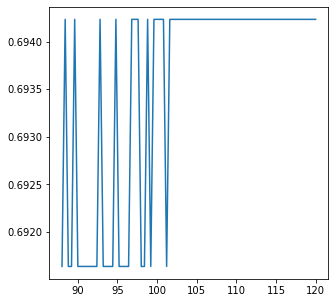

In [158]:
plt.figure(figsize=(5,5))
plt.plot(C_range_5[20:],valid_baccs[20:],label="valid balanced acc")

In [154]:
C_range_5.shape

(101,)

In [156]:
len(valid_baccs)

101

In [162]:
# Optimal C
C = 100

## Submission

In [163]:
clf = SVC(C=C,kernel="linear").fit(X_train,y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
train_accs = accuracy_score(y_pred_train,y_train)
valid_accs = accuracy_score(y_pred_test,y_test)
train_baccs = balanced_accuracy_score(y_pred_train,y_train)
valid_baccs = balanced_accuracy_score(y_pred_test,y_test)
print(f"C: {C:.2f} | TA {train_accs:.4f} VA {valid_accs:.4f} TBA {train_baccs:.4f} VBA {valid_baccs:.4f}")

C: 100.00 | TA 0.7164 VA 0.7121 TBA 0.7164 VBA 0.6942


In [164]:
X_train

,Age,Sex,PositivityAtAdmission,Temp_C,Cough,DifficultyInBreathing,WBC,RBC,CRP,Glucose,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,Hospital_A,Hospital_BDF,Hospital_CE
0,0.359139,0.0,1.0,0.946988,1.0,0.0,0.110113,0.628297,0.076074,0.137009,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.572667,0.0,1.0,0.891566,0.0,0.0,0.219461,0.684652,0.112182,0.137009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.390000,1.0,1.0,0.896386,1.0,0.0,0.194418,0.413669,0.001315,0.091533,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.440000,0.0,1.0,0.915663,1.0,0.0,0.126936,0.665468,0.009115,0.144165,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.760000,0.0,1.0,0.930120,1.0,0.0,0.338750,0.858513,0.024049,0.195652,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.540000,0.0,1.0,0.915663,0.0,1.0,0.139553,0.643885,0.006082,0.127002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
962,0.620000,1.0,1.0,0.903614,0.0,1.0,0.100746,0.613909,0.023330,0.123570,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
963,0.820000,1.0,1.0,0.925301,0.0,1.0,0.126171,0.448441,0.015267,0.116705,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
964,0.480000,1.0,1.0,0.867470,0.0,0.0,0.107054,0.537170,0.000491,0.137300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [165]:
df_subm

,Age,Sex,PositivityAtAdmission,Temp_C,Cough,DifficultyInBreathing,WBC,RBC,CRP,Glucose,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,Hospital_A,Hospital_BDF,Hospital_CE
0,0.720000,1.0,1.0,0.898795,1.0,0.0,0.102657,0.549161,0.006941,0.112128,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.607917,1.0,1.0,0.891566,1.0,0.0,0.121774,0.581535,0.036284,0.143975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.519833,0.0,1.0,0.927711,1.0,0.0,0.231887,0.597122,0.151972,0.143975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.628917,0.0,1.0,0.899495,0.0,1.0,0.009731,0.612710,0.154426,0.143975,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.440000,0.0,0.0,0.908434,0.0,0.0,0.175492,0.613909,0.074847,0.276888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.500000,1.0,1.0,0.891566,1.0,0.0,0.079144,0.491607,0.003313,0.153318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
296,0.810000,1.0,1.0,0.869880,0.0,1.0,0.084496,0.497602,0.011832,0.131579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
297,0.680000,1.0,1.0,0.932530,0.0,1.0,0.095584,0.553957,0.014917,0.128146,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
298,0.600000,1.0,1.0,0.872289,1.0,1.0,0.100172,0.460432,0.002331,0.146453,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [166]:
y_pred = clf.predict(df_subm)

In [170]:
y_pred_final = pd.DataFrame(y_pred)
y_pred_final

,0
0,0
1,0
2,0
3,1
4,0
...,...
295,0
296,0
297,0
298,0


In [176]:
y_pred_final = y_pred_final.rename(columns={0:"Prediction"})

In [178]:
y_pred_final = y_pred_final.replace({0:"MILD",1:"SEVERE"})
y_pred_final

,Prediction
0,MILD
1,MILD
2,MILD
3,SEVERE
4,MILD
...,...
295,MILD
296,MILD
297,MILD
298,MILD


In [168]:
# dm_competition4_[your_name]_submission[submission_number].txt

In [179]:
name = "dm_competition4_BelaJSzekeres_submission1.txt"
y_pred_final.to_csv(name,header=None,index=False)